In [1]:
###Tutorial Overview
# 1. Numerical Feature Selection
# 2. Modeling with Selected Features
# 3. Tune the number of selected features

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
def load_dataset(fileName):
    dataframe = pd.read_csv(fileName,header=None)
    data = dataframe.values
    X = data[:,:-1]
    y = data[:,-1]
    
    return X,y

In [4]:
#load data set
X,y = load_dataset('../dataset/pima-indians-diabetes.csv')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)
print("Train",X_train.shape, y_train.shape)
print("Test",X_test.shape,y_test.shape)

Train (514, 8) (514,)
Test (254, 8) (254,)


### Numerical Feature Selection

#### ANOVA F-test 

Features 0 : 16.527385
Features 1 : 131.325562
Features 2 : 0.042371
Features 3 : 1.415216
Features 4 : 12.778966
Features 5 : 49.209523
Features 6 : 13.377142
Features 7 : 25.126440


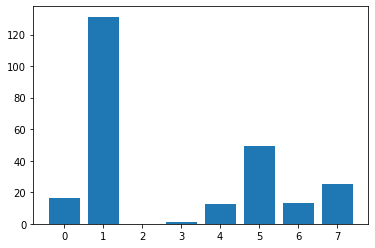

In [5]:
##ANOVA -> Analysis of Variance
### F test -> Is a class of statistical tests that calculate ratio between variance values
### ANOVA is used when one variable is Numerica and one Variable is Categorical
### Features that are independent of the target variable can be removed from the dataset

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

##Configure select all features
fs = SelectKBest(score_func=f_classif,k='all')

# Fit the training data
fs.fit(X_train,y_train)

#Transform the training data
X_train_fs = fs.transform(X_train)

#Transform the test data
X_test_fs = fs.transform(X_test)

##  What are the scores of the features
for i in range(len(fs.scores_)):
    print("Features %d : %f"%(i,fs.scores_[i]))

#Plot the feature scores
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()

#### Mutual information Feature Selection

Train (514, 8) (514,)
Test (254, 8) (254,)
Features 0 : 0.031759
Features 1 : 0.103620
Features 2 : 0.057436
Features 3 : 0.008403
Features 4 : 0.017090
Features 5 : 0.084139
Features 6 : 0.007937
Features 7 : 0.050781


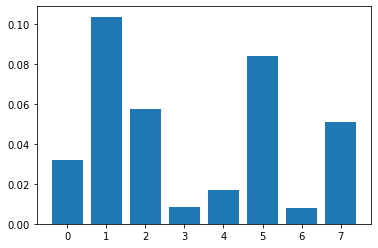

In [8]:
from sklearn.feature_selection import mutual_info_classif

X,y = load_dataset('../dataset/pima-indians-diabetes.csv')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)
print("Train",X_train.shape, y_train.shape)
print("Test",X_test.shape,y_test.shape)

def feature_selection(X_train,y_train,X_test):
    
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif,k="all")

    #Fit the training data
    fs.fit(X_train,y_train)

    #transform train data
    X_train_fs = fs.transform(X_train)

    #Treansform test data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs,X_test_fs,fs

X_train_fs ,X_test_fs,fs = feature_selection(X_train,y_train,X_test)

#print the scores of the features
for i in range(len(fs.scores_)):
    print("Features %d : %f"%(i,fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()

### Modeling with Selected Features

#### Model Built with all features

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Loading the dataset
X,y = load_dataset('../dataset/pima-indians-diabetes.csv')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)
print("Train",X_train.shape, y_train.shape)
print("Test",X_test.shape,y_test.shape)

model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

yhat = model.predict(X_test)

accuracy = accuracy_score(y_test,yhat)*100
print("Accuracy :%.3f"%(accuracy))

Train (514, 8) (514,)
Test (254, 8) (254,)
Accuracy :77.559


#### Model Built on ANOVA f test features

In [12]:
#Loading the dataset
X,y = load_dataset('../dataset/pima-indians-diabetes.csv')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)
print("Train",X_train.shape, y_train.shape)
print("Test",X_test.shape,y_test.shape)

def feature_select(X_train,y_train,X_test,no_features,score_class):
    fs = SelectKBest(score_func=score_class,k=no_features)
    fs.fit(X_train,y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs,X_test_fs,fs

X_train_fs,X_test_fs,fs = feature_select(X_train,y_train,X_test,4,f_classif)

model = LogisticRegression(solver="liblinear")

model.fit(X_train_fs,y_train)

yhat = model.predict(X_test_fs)

accuracy = accuracy_score(y_test,yhat)*100
print("Accuracy : %.3f"%(accuracy))

Train (514, 8) (514,)
Test (254, 8) (254,)
Accuracy : 78.740


#### Model built on mutual information

In [13]:
#Loading the dataset
X,y = load_dataset('../dataset/pima-indians-diabetes.csv')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)
print("Train",X_train.shape, y_train.shape)
print("Test",X_test.shape,y_test.shape)

def feature_select(X_train,y_train,X_test,no_features,score_class):
    fs = SelectKBest(score_func=score_class,k=no_features)
    fs.fit(X_train,y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs,X_test_fs,fs

X_train_fs,X_test_fs,fs = feature_select(X_train,y_train,X_test,4,mutual_info_classif)

model = LogisticRegression(solver="liblinear")

model.fit(X_train_fs,y_train)

yhat = model.predict(X_test_fs)

accuracy = accuracy_score(y_test,yhat)*100
print("Accuracy : %.3f"%(accuracy))

Train (514, 8) (514,)
Test (254, 8) (254,)
Accuracy : 77.559


### Tune the number of selected features

In [5]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Loading the dataset
X,y = load_dataset('../dataset/pima-indians-diabetes.csv')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)
print("Train",X_train.shape, y_train.shape)
print("Test",X_test.shape,y_test.shape)

cv = RepeatedStratifiedKFold(n_repeats=3,n_splits=10,random_state=1)

anova = SelectKBest(score_func=f_classif)
model = LogisticRegression(solver="liblinear")

pipeline = Pipeline([("anv",anova),("lr",model)])

grid = {}
grid["anv__k"] = [i for i in range(X_train.shape[1])]

search = GridSearchCV(pipeline,grid,scoring="accuracy",cv=cv,n_jobs=-1)

search.fit(X_train,y_train)

print("Best Accuracy : %.3f"%(search.best_score_))
print("Best params :%s"%(search.best_params_))
print("Best estimator :%s"%(search.best_estimator_))


Train (514, 8) (514,)
Test (254, 8) (254,)
Best Accuracy : 0.762
Best params :{'anv__k': 7}
Best estimator :Pipeline(steps=[('anv', SelectKBest(k=7)),
                ('lr', LogisticRegression(solver='liblinear'))])


#### Compare different number of features used to compare 

Train (514, 8) (514,)
Test (254, 8) (254,)
1  0.748 0.048
2  0.756 0.042
3  0.761 0.044
4  0.759 0.042
5  0.770 0.041
6  0.766 0.042
7  0.770 0.042
8  0.768 0.040


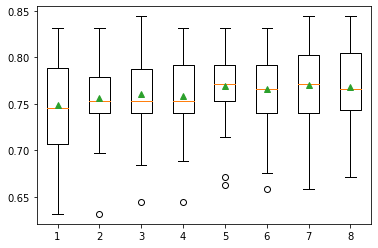

In [8]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#Loading the dataset
X,y = load_dataset('../dataset/pima-indians-diabetes.csv')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)
print("Train",X_train.shape, y_train.shape)
print("Test",X_test.shape,y_test.shape)

def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    scores = cross_val_score(model,X,y,scoring="accuracy",n_jobs=-1,cv=cv)
    return scores

num_feautes = [i+1 for i in range(X_train.shape[1])]

results = []

for n in num_feautes:
    model = LogisticRegression(solver="liblinear")
    fs = SelectKBest(score_func=f_classif,k=n)
    pipeline = Pipeline([("avoa",fs),("lr",model)])
    
    scores = evaluate_model(pipeline)
    
    results.append(scores)
    
    print("%s  %.3f %.3f"%(n,np.mean(scores),np.std(scores)))

plt.boxplot(results,labels=num_feautes,showmeans=True)
plt.show()